## Exercise 2

In [33]:
# Import packages
import numpy as np
import math
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Initialize parameters
alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

# Definefunctions
def demand(w, alpha, z, k):
    return ((((1-alpha)*z)/w)**(1/alpha))*k

def profit(w, alpha, z, k):
    nd = demand(w, alpha, z, k)
    return z*(k**alpha)*(nd)**(1-alpha) - w*nd

def supply(w, alpha, z, k, b, h, t):
    pi = profit(w, alpha, z, k)
    return h - (b/(w*(1+b)))*(w*h+pi-t)
    

In [34]:
"""Find the market-clearing wage rate using fsolve."""

f = lambda w: demand(w, alpha, z, k) - supply(w, alpha, z, k, b, h, t)
w_opt = fsolve(f, 0.5)[0]

print("Market-clearing wage: " +str(w_opt))

Market-clearing wage: 0.627361779044


In [35]:
"""Find a first-order approximation for wage as a function of k."""
w0 = w_opt
k0 = 5
f0 = f(w0)
inc = 1e-6

#Numerical methods to approximate Fk
k = k0 + inc
f1 = f(w0)
k = k - inc
Fk = (f1-f0)/inc

#Numerical methods to approxmate Fw.
w1 = w0 + inc
f1 = f(w1)
Fw = (f1-f0)/inc

slope = -Fk/Fw

order1 = lambda k: w0 + slope*(k-k0)

1.62125302072
-38.9856326874
0.0415859102178


In [38]:
"""Find a second-order approximation also about k = 5."""

#Numerical methods to approximate Fkk
k = k0 + inc
fc = f(w0)
k = k - inc
fb = f(w0)
k = k - inc
fa = f(w0)
k = k + inc
Fkk  = (fc - 2*fb + fa)/inc**2

#Numerical methods to approximate Fwk
k = k0 + inc
whigh = w0 + inc
fa = f(whigh)

wlow = w0 - inc
fb = f(wlow)

k = k0 - inc
fc = f(wlow)
fd = f(whigh)

k = k0

Fwk = (fa - fd - fb + fc)/(4*inc**2)

#Numerical methods to approximate Fww
fa = f(whigh)
fb = f(w0)
fc = f(wlow)
Fww = (fa - 2*fb + fc)/(inc**2)

#Numerical methods to approximate wk
k = k0 + inc
w1 = fsolve(f, 0.5)[0]
k = k0
wk = (w1 - w0)/inc

a = -(Fww*wk**2 + 2*Fwk*wk + Fkk)/Fw
order2 = lambda k: order1(k) + 0.5*a*(k-k0)**2

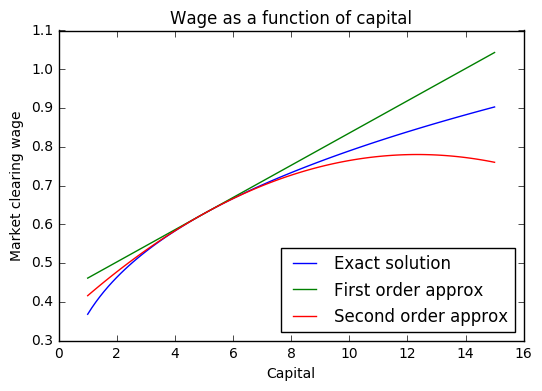

In [39]:
"""Set up a grid. Use fsolve to find the equilibrium value
of the wage at each point onthe grid."""

k_grid = np.linspace(1, 15, 100)
w_opt = []
for k_val in k_grid:
    g = lambda w: demand(w, alpha, z, k_val) - supply(w, alpha, z, k_val, b, h, t)
    w_opt.append(fsolve(g, 0.5)[0])
    
plt.plot(k_grid, w_opt, label="Exact solution")
plt.plot(k_grid, order1(k_grid), label="First order approx")
plt.plot(k_grid, order2(k_grid), label="Second order approx")
plt.title("Wage as a function of capital")
plt.xlabel("Capital")
plt.ylabel("Market clearing wage")
plt.legend(loc = "lower right")
plt.show()

## Exercise 3

In [93]:
h = lambda y: (x**.35 + .9*x - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)

In [94]:
"""Linear approximation"""

y0 = 49.2166
x0 = 100
x = x0
h0 = h(y0)
inc = 1e-4

#Numerical methods to approximate Fx
x = x0 + inc
h1 = h(y0)
x = x - inc
Fx = (h1-h0)/inc

#Numerical methods to approxmate Fy.
y1 = y0 + inc
h1 = h(y1)
Fy = (h1-h0)/inc

slope = -Fx/Fy

linear = lambda x: y0 + slope*(x-x0)

In [95]:
"""Quadratic approximation"""

'Quadratic approximation'

In [96]:
"""Cubic approximation"""

'Cubic approximation'

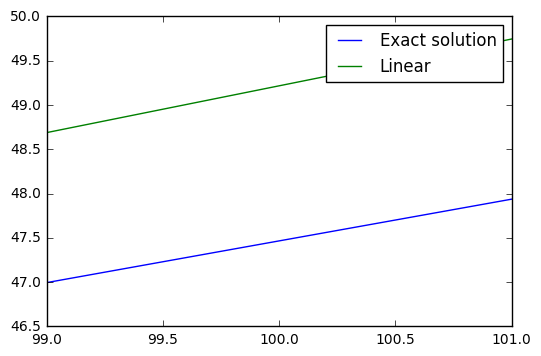

In [97]:
"""Set up a grid. Use fsolve to find the equilibrium value
of the wage at each point onthe grid."""

x_grid = np.linspace(99, 101, 100)
y_opt = []
for x_val in x_grid:
    h1 = lambda y: (x_val**.35 + .9*x_val - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)
    y_opt.append(fsolve(h1, 40)[0])
    
plt.plot(x_grid, y_opt, label="Exact solution")
plt.plot(x_grid, linear(x_grid), label="Linear")
#plt.plot(x_grid, quadratic(x_grid), label='Quadratic')
#plt.plot(x_grid, cubic(x_grid), label='Cubic')
plt.legend()
plt.show()

In [91]:
"""Error plot"""

'Error plot'

## Exercise 4